# Plot gamma distribution of priors

In [8]:
%pylab inline
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

Populating the interactive namespace from numpy and matplotlib


Shape 0.2000 scale 0.0500
Mean
0.01
Median
0.0011047117093796789
Shape 0.3000 scale 0.0333
Mean
0.01
Median
0.002396674704884286
Shape 0.6000 scale 0.0167
Mean
0.01
Median
0.00527989789620571


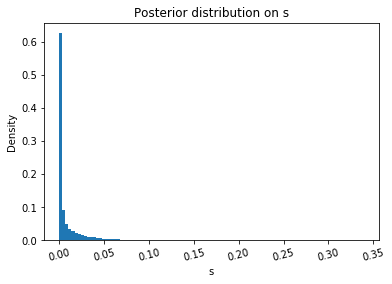

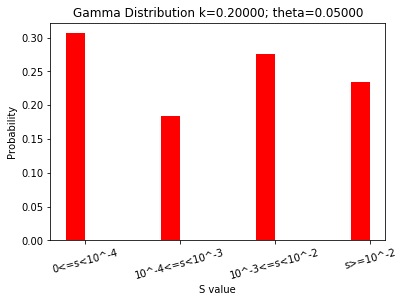

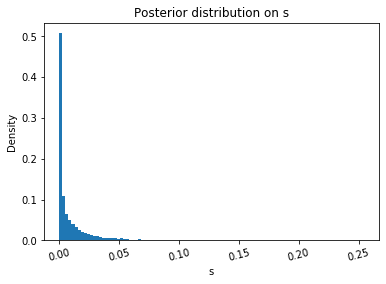

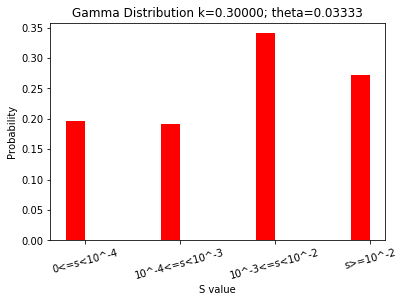

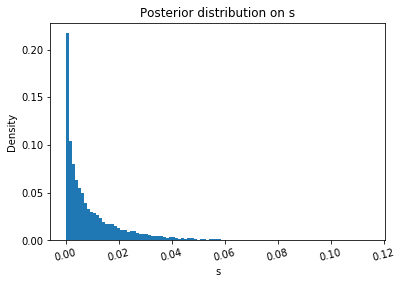

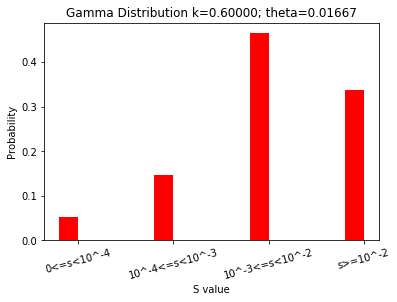

In [9]:
# shape_scale_combos = [(0.187, 0.0356),(0.0881,0.2541),(0.13,0.5)]
shape_scale_combos = [(0.2,10**-2/0.2),(0.3,10**-2/0.3),(0.6,10**-2/0.6)]
fig_num = 0
for combo in shape_scale_combos:
    
    shape = combo[0]
    scale = combo[1] 
    print('Shape %.4f scale %.4f'%(shape, scale))
    print('Mean')
    print(shape*scale)

    beta = 1/scale
    num_sims = 10000

    s = [] # List of s values drawn from gamma distribution
    for i in range(0, num_sims):
        s_val = np.random.gamma(shape, scale)
        if s_val > 1:
            s_val = 1
        s.append(s_val)

    # List of binned s values
    # Bins: 0<=s<10^-4, 10^-4<=s<10^-3, 10^-3<=s<10^-2, s>=10^-2
    svals = [0, 0, 0, 0] 
    for elem in s:
        if elem < 10**-4:
            svals[0] += 1
        elif elem < 10**-3:
            svals[1] += 1
        elif elem < 10**-2:
            svals[2] += 1
        elif elem >= 10**-2:
            svals[3] += 1

    #print("percent s < 10^-4")
    #print(svals[0]/num_sims*100)
    #print("percent 10^-4 <= s < 10^-3")
    #print(svals[1]/num_sims*100)
    #print("percent 10^-3 <= s < 10^-2")
    #print(svals[2]/num_sims*100)
    #print("percent s >= 0.01")
    #print(svals[3]/num_sims*100)

    print('Median')
    print(np.median(s))

    # Plot pdf of gamma distribution
    fig_num = fig_num + 1
    plt.figure(fig_num)
    plt.hist(s, bins = 100, weights=np.ones(len(s)) / len(s)) 
    plt.xlabel("s")
    plt.ylabel("Density")
    plt.title("Posterior distribution on s")
    plt.savefig("/storage/BonnieH/selection_project/figures/figures/gamma_distribution/gamma_distribution_pdf_k_%.4f_theta_%.4f.pdf"%(shape,scale),bbox_inches='tight')
    plt.xticks(rotation=15) 

    # Plot discrete pdf of gamma distribution
    fig_num = fig_num + 1
    plt.figure(fig_num)
    x = ['0<=s<10^-4', '10^-4<=s<10^-3', '10^-3<=s<10^-2', 's>=10^-2']
    y_pos = np.arange(len(x))
    barWidth = 0.2
    r1 = np.arange(len(x))

    # Normalize s values
    total = sum(svals)
    for i in range(0, len(svals)):
        svals[i] = svals[i]/total

    plt.bar(r1, svals, color='red', width=barWidth) 
    plt.xticks([r + barWidth/2 for r in range(len(x))], x)
    plt.xticks(rotation=15) 
    plt.xlabel("S value")
    plt.ylabel("Probability")
    plt.title("Gamma Distribution k=%.5f; theta=%.5f"%(shape, scale)) 
    plt.savefig("/storage/BonnieH/selection_project/figures/figures/gamma_distribution/gamma_distribution_pdf_discrete_k_%.4f_theta_%.4f.pdf"%(shape,scale),bbox_inches='tight')